# SALARY ANALYSIS  USING LINEAR AND LOGISTIC REGRESSION

# ABSTRACT:

## The dataset infers the salary analysis of an employee and the factors affecting it.
### The main aim is to perform linear and logistics regresssion and to find out the various independent variables and their effect in determining the dependent variable, base anualised salary  in the given data set.
### The dataset consists of 13 columns and 9,103 rows The columns are: (group, pay_type,          exempt_indicator, base_annualized_salary, actual_salary_paid, overtime_paid ,       performance_bonus,extra_pay, other_compensation, total_compensation                 paid_by_another_entity, paid_by_state_or_local_government  ,highorlow_base_annualized_salary).  The main input variables are: 1) actual_salary_paid 2) total_compensation 3) exempt_indicator 4) group 5) pay_type 6) paid_by_another_entity 7) extra_pay']    Target variable: Base_annulized_salary
### Statistical concepts used are: correlation, R-Squared value,Root mean Squared Error, p-value, t-statistics and standard error
### The following Techniques have been used to perform the analysis and arrive at the conclusions
### a)Exploratory Data Analysis
### b)Linear Regression
### c)Logistic Regression
### d)Multicollinearity test
### e)Step-wise regression
### f)Interaction effects 
### g)Ridge Regularization

In [813]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt #2D plotting library
import numpy as np              #multidemensional array and matrices(ndarray)
import pandas as pd             #data processing..to take CSV file i/p
from scipy import stats         #Scientific computing env/to perform mathematical functions
import seaborn as sns           #statistical data visulaization and styling
import re                       #matching pattern
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
import math
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [814]:
# importing the dataset using pandas library
df=pd.read_csv("salary-information-for-local-development-corporations.csv", decimal = ',')
original= df.copy()

In [815]:
#to display the top 5 rows
df.head()

,Authority Name,Fiscal Year End Date,Has Employees,Last Name,Middle Initial,First Name,Title,Group,Department,Pay Type,...,Base Annualized Salary,Actual Salary Paid,Overtime Paid,Performance Bonus,Extra Pay,Other Compensation,Total Compensation,Paid By Another Entity,Paid by State or Local Government,HighorLow_Base_Annualized_Salary
0,Syracuse Economic Development Corporation,2013-12-31T00:00:00.000,NaN,DeLaney,A,Judith,Executive Director,Managerial,0,PT,...,0,0,0,0,0,0,0,Y,Y,0
1,Syracuse Economic Development Corporation,2014-12-31T00:00:00.000,NaN,Walsh,R,Benjamin,President,Executive,0,PT,...,0,0,0,0,0,0,0,Y,Y,0
2,Syracuse Economic Development Corporation,2014-12-31T00:00:00.000,NaN,DeLaney,A,Judith,Executive Director,Managerial,0,PT,...,0,0,0,0,0,0,0,Y,Y,0
3,Syracuse Economic Development Corporation,2014-12-31T00:00:00.000,NaN,Babilon,NaN,Thomas,Attorney,Managerial,0,PT,...,0,0,0,0,0,0,0,Y,Y,0
4,Syracuse Economic Development Corporation,2015-12-31T00:00:00.000,NaN,Walsh,R,Benjamin,President,Executive,0,PT,...,0,0,0,0,0,0,0,Y,Y,0


In [816]:
#to display the last 5 rows
df.tail()

,Authority Name,Fiscal Year End Date,Has Employees,Last Name,Middle Initial,First Name,Title,Group,Department,Pay Type,...,Base Annualized Salary,Actual Salary Paid,Overtime Paid,Performance Bonus,Extra Pay,Other Compensation,Total Compensation,Paid By Another Entity,Paid by State or Local Government,HighorLow_Base_Annualized_Salary
9098,Brooklyn Navy Yard Development Corporation,2017-06-30T00:00:00.000,NaN,SHERRON,NaN,MARK,Concierge Officer,Administrative and Clerical,NaN,FT,...,27040,27040,0,0,0,0,27040,N,NaN,0
9099,Brooklyn Navy Yard Development Corporation,2017-06-30T00:00:00.000,NaN,GJELOSHI,NaN,NASER,Senior VP of Property Management,Operational,NaN,FT,...,159999.84,159999.84,0,0,0,0,159999.84,N,NaN,1
9100,Genesee County Funding Corporation,2017-12-31T00:00:00.000,NaN,Masse,A,Mark,None,Operational,NaN,PT,...,0,0,0,0,0,0,0,Y,N,0
9101,Jefferson County Local Development Corporation,2017-09-30T00:00:00.000,NaN,Weir,M,Frank,Director of Marketing,Managerial,NaN,FT,...,57931.3,57931.3,0,0,0,0,57931.3,N,NaN,0
9102,Putnam Tobacco Asset Securitization Corporation,2011-12-31T00:00:00.000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [817]:
#To check the number of rows and columns of the data set
df.shape

(9103, 21)

In [818]:
# To check the data type of the columns of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9103 entries, 0 to 9102
Data columns (total 21 columns):
Authority Name                       9103 non-null object
Fiscal Year End Date                 9103 non-null object
Has Employees                        728 non-null object
Last Name                            8375 non-null object
Middle Initial                       1034 non-null object
First Name                           8375 non-null object
Title                                8375 non-null object
Group                                8375 non-null object
Department                           3325 non-null object
Pay Type                             8375 non-null object
Exempt Indicator                     8375 non-null object
Base Annualized Salary               8375 non-null object
Actual Salary Paid                   8375 non-null object
Overtime Paid                        8375 non-null object
Performance Bonus                    8375 non-null object
Extra Pay               

In [819]:
# To check the null values
print('number of missing data:')
print(df.isnull().sum())

number of missing data:
Authority Name                          0
Fiscal Year End Date                    0
Has Employees                        8375
Last Name                             728
Middle Initial                       8069
First Name                            728
Title                                 728
Group                                 728
Department                           5778
Pay Type                              728
Exempt Indicator                      728
Base Annualized Salary                728
Actual Salary Paid                    728
Overtime Paid                         728
Performance Bonus                     728
Extra Pay                             728
Other Compensation                    728
Total Compensation                    728
Paid By Another Entity                728
Paid by State or Local Government    7478
HighorLow_Base_Annualized_Salary        0
dtype: int64


In [820]:
# To fimd the percentage of the null values given
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Has Employees,8375,92.00
Middle Initial,8069,88.64
Paid by State or Local Government,7478,82.15
Department,5778,63.47
Other Compensation,728,8.00
Extra Pay,728,8.00
Performance Bonus,728,8.00
Overtime Paid,728,8.00
Actual Salary Paid,728,8.00
Base Annualized Salary,728,8.00


# Data Cleaning

##### It's a process of correcting the inaccurate data. We need to check and clean the data in order to remove any null values. The following isnull function will figure out if there are any missing values in the dataframe, and will then sum up the total for each column and also we need to drop the redundant columns.

In [821]:
#Dropping the columns
df.drop('Fiscal Year End Date',axis='columns',inplace=True)

In [822]:
df.drop('Has Employees',axis='columns',inplace=True)

In [823]:
df.drop('Last Name',axis='columns',inplace=True)

In [824]:
df.drop('Middle Initial',axis='columns',inplace=True) 

In [825]:
df.drop('First Name',axis='columns',inplace=True) 

In [826]:
df.drop('Authority Name',axis='columns',inplace=True) 

In [827]:
df.drop('Title',axis='columns',inplace=True) 

In [828]:
df.drop('Department',axis='columns',inplace=True) 

In [829]:
df.head()

,Group,Pay Type,Exempt Indicator,Base Annualized Salary,Actual Salary Paid,Overtime Paid,Performance Bonus,Extra Pay,Other Compensation,Total Compensation,Paid By Another Entity,Paid by State or Local Government,HighorLow_Base_Annualized_Salary
0,Managerial,PT,Y,0,0,0,0,0,0,0,Y,Y,0
1,Executive,PT,Y,0,0,0,0,0,0,0,Y,Y,0
2,Managerial,PT,Y,0,0,0,0,0,0,0,Y,Y,0
3,Managerial,PT,Y,0,0,0,0,0,0,0,Y,Y,0
4,Executive,PT,Y,0,0,0,0,0,0,0,Y,Y,0


In [830]:
# changing the notation of the columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary
0,Managerial,PT,Y,0,0,0,0,0,0,0,Y,Y,0
1,Executive,PT,Y,0,0,0,0,0,0,0,Y,Y,0
2,Managerial,PT,Y,0,0,0,0,0,0,0,Y,Y,0
3,Managerial,PT,Y,0,0,0,0,0,0,0,Y,Y,0
4,Executive,PT,Y,0,0,0,0,0,0,0,Y,Y,0
5,Managerial,PT,Y,0,0,0,0,0,0,0,Y,Y,0
6,Managerial,PT,Y,0,0,0,0,0,0,0,Y,Y,0
7,Managerial,PT,Y,0,0,0,0,0,0,0,Y,Y,0
8,Managerial,PT,Y,0,0,0,0,0,0,0,Y,Y,0
9,Technical and Engineering,FT,N,41260,40212.72,1696.03,1317,2380.38,0,45606.13,N,NaN,0


In [831]:
df.dtypes

group                                object
pay_type                             object
exempt_indicator                     object
base_annualized_salary               object
actual_salary_paid                   object
overtime_paid                        object
performance_bonus                    object
extra_pay                            object
other_compensation                   object
total_compensation                   object
paid_by_another_entity               object
paid_by_state_or_local_government    object
highorlow_base_annualized_salary      int64
dtype: object

In [832]:
#one hot encode
g={"group":{"Managerial":6,"Technical and Engineering":5,"Professional":4,"Operational":3,"Executive":2,"Administrative and Clerical":1}}
df.replace(g, inplace=True)
df.head(10)


,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary
0,6.0,PT,Y,0,0,0,0,0,0,0,Y,Y,0
1,2.0,PT,Y,0,0,0,0,0,0,0,Y,Y,0
2,6.0,PT,Y,0,0,0,0,0,0,0,Y,Y,0
3,6.0,PT,Y,0,0,0,0,0,0,0,Y,Y,0
4,2.0,PT,Y,0,0,0,0,0,0,0,Y,Y,0
5,6.0,PT,Y,0,0,0,0,0,0,0,Y,Y,0
6,6.0,PT,Y,0,0,0,0,0,0,0,Y,Y,0
7,6.0,PT,Y,0,0,0,0,0,0,0,Y,Y,0
8,6.0,PT,Y,0,0,0,0,0,0,0,Y,Y,0
9,5.0,FT,N,41260,40212.72,1696.03,1317,2380.38,0,45606.13,N,NaN,0


In [833]:
#one hot encode
g={"pay_type":{"PT":0,"FT":1}}
df.replace(g, inplace=True)
df.head(10)

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary
0,6.0,0.0,Y,0,0,0,0,0,0,0,Y,Y,0
1,2.0,0.0,Y,0,0,0,0,0,0,0,Y,Y,0
2,6.0,0.0,Y,0,0,0,0,0,0,0,Y,Y,0
3,6.0,0.0,Y,0,0,0,0,0,0,0,Y,Y,0
4,2.0,0.0,Y,0,0,0,0,0,0,0,Y,Y,0
5,6.0,0.0,Y,0,0,0,0,0,0,0,Y,Y,0
6,6.0,0.0,Y,0,0,0,0,0,0,0,Y,Y,0
7,6.0,0.0,Y,0,0,0,0,0,0,0,Y,Y,0
8,6.0,0.0,Y,0,0,0,0,0,0,0,Y,Y,0
9,5.0,1.0,N,41260,40212.72,1696.03,1317,2380.38,0,45606.13,N,NaN,0


In [834]:
#one hot encode
g={"exempt_indicator":{"Y":1,"N":0}}
df.replace(g, inplace=True)
df.head(10)

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary
0,6.0,0.0,1.0,0,0,0,0,0,0,0,Y,Y,0
1,2.0,0.0,1.0,0,0,0,0,0,0,0,Y,Y,0
2,6.0,0.0,1.0,0,0,0,0,0,0,0,Y,Y,0
3,6.0,0.0,1.0,0,0,0,0,0,0,0,Y,Y,0
4,2.0,0.0,1.0,0,0,0,0,0,0,0,Y,Y,0
5,6.0,0.0,1.0,0,0,0,0,0,0,0,Y,Y,0
6,6.0,0.0,1.0,0,0,0,0,0,0,0,Y,Y,0
7,6.0,0.0,1.0,0,0,0,0,0,0,0,Y,Y,0
8,6.0,0.0,1.0,0,0,0,0,0,0,0,Y,Y,0
9,5.0,1.0,0.0,41260,40212.72,1696.03,1317,2380.38,0,45606.13,N,NaN,0


In [835]:
#one hot encode
g={"paid_by_another_entity":{"Y":1,"N":0}}
df.replace(g, inplace=True)
df.head(10)

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary
0,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,Y,0
1,2.0,0.0,1.0,0,0,0,0,0,0,0,1.0,Y,0
2,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,Y,0
3,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,Y,0
4,2.0,0.0,1.0,0,0,0,0,0,0,0,1.0,Y,0
5,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,Y,0
6,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,Y,0
7,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,Y,0
8,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,Y,0
9,5.0,1.0,0.0,41260,40212.72,1696.03,1317,2380.38,0,45606.13,0.0,NaN,0


In [836]:
#one hot encode
g={"paid_by_state_or_local_government":{"Y":1,"N":0}}
df.replace(g, inplace=True)
df.head(10)

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary
0,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
1,2.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
2,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
3,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
4,2.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
5,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
6,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
7,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
8,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
9,5.0,1.0,0.0,41260,40212.72,1696.03,1317,2380.38,0,45606.13,0.0,NaN,0


In [837]:
# to see the null values
df.isnull().sum()

group                                 728
pay_type                              728
exempt_indicator                      728
base_annualized_salary                728
actual_salary_paid                    728
overtime_paid                         728
performance_bonus                     728
extra_pay                             728
other_compensation                    728
total_compensation                    728
paid_by_another_entity                728
paid_by_state_or_local_government    7478
highorlow_base_annualized_salary        0
dtype: int64

In [838]:
#to change the data types of the column
df["pay_type"] = df.pay_type.convert_objects(convert_numeric=True)

In [839]:
df.dtypes

group                                float64
pay_type                             float64
exempt_indicator                     float64
base_annualized_salary                object
actual_salary_paid                    object
overtime_paid                         object
performance_bonus                     object
extra_pay                             object
other_compensation                    object
total_compensation                    object
paid_by_another_entity               float64
paid_by_state_or_local_government    float64
highorlow_base_annualized_salary       int64
dtype: object

In [840]:
df.head()

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary
0,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
1,2.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
2,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
3,6.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0
4,2.0,0.0,1.0,0,0,0,0,0,0,0,1.0,1.0,0


In [841]:
p=df.group.median()
p

4.0

In [842]:
#Removing the null values
df.replace("" , np.nan, inplace=True)


In [843]:
#null values are replaced by the median value
df.group=df.group.fillna(p)


In [844]:
df.group=df.group.fillna(p)


In [845]:
df.pay_type=df.pay_type.fillna(p)


In [846]:
df.exempt_indicator=df.exempt_indicator.fillna(p)


In [847]:
df.base_annualized_salary=df.base_annualized_salary.fillna(p)


In [848]:
df.actual_salary_paid=df.actual_salary_paid.fillna(p)


In [849]:
df.overtime_paid=df.overtime_paid.fillna(p)


In [850]:
df.performance_bonus=df.performance_bonus.fillna(p)


In [851]:
df.extra_pay=df.extra_pay.fillna(p)


In [852]:
df.other_compensation=df.other_compensation.fillna(p)


In [853]:
df.total_compensation=df.total_compensation.fillna(p)


In [854]:
df.paid_by_another_entity=df.paid_by_another_entity.fillna(p)


In [855]:
df.paid_by_state_or_local_government=df.paid_by_state_or_local_government.fillna(p)


In [856]:
print('number of missing data:')
print(df.isnull().sum())

number of missing data:
group                                0
pay_type                             0
exempt_indicator                     0
base_annualized_salary               0
actual_salary_paid                   0
overtime_paid                        0
performance_bonus                    0
extra_pay                            0
other_compensation                   0
total_compensation                   0
paid_by_another_entity               0
paid_by_state_or_local_government    0
highorlow_base_annualized_salary     0
dtype: int64


In [857]:
df.corr()

,group,pay_type,exempt_indicator,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary
group,1.000000,0.222448,0.257006,0.096132,0.143279,0.136536
pay_type,0.222448,1.000000,0.841720,0.801626,0.253067,-0.006493
exempt_indicator,0.257006,0.841720,1.000000,0.853659,0.072214,0.003762
paid_by_another_entity,0.096132,0.801626,0.853659,1.000000,-0.209993,-0.133602
paid_by_state_or_local_government,0.143279,0.253067,0.072214,-0.209993,1.000000,0.134094
highorlow_base_annualized_salary,0.136536,-0.006493,0.003762,-0.133602,0.134094,1.000000


In [858]:
#to find the data type of the model
df.dtypes

group                                float64
pay_type                             float64
exempt_indicator                     float64
base_annualized_salary                object
actual_salary_paid                    object
overtime_paid                         object
performance_bonus                     object
extra_pay                             object
other_compensation                    object
total_compensation                    object
paid_by_another_entity               float64
paid_by_state_or_local_government    float64
highorlow_base_annualized_salary       int64
dtype: object

In [859]:
df["base_annualized_salary"] = df.base_annualized_salary.convert_objects(convert_numeric=True)

In [860]:
df["actual_salary_paid"] = df.actual_salary_paid.convert_objects(convert_numeric=True)

In [861]:
df["overtime_paid"] = df.overtime_paid.convert_objects(convert_numeric=True)

In [862]:
df["performance_bonus"] = df.performance_bonus.convert_objects(convert_numeric=True)

In [863]:
df["extra_pay"] = df.extra_pay.convert_objects(convert_numeric=True)

In [864]:
df["other_compensation"] = df.other_compensation.convert_objects(convert_numeric=True)

In [865]:
df["total_compensation"] = df.total_compensation.convert_objects(convert_numeric=True)

In [866]:
df["paid_by_another_entity"] = df.paid_by_another_entity.convert_objects(convert_numeric=True)

In [867]:
df["paid_by_state_or_local_government"] = df.paid_by_state_or_local_government.convert_objects(convert_numeric=True)

In [868]:
df.dtypes

group                                float64
pay_type                             float64
exempt_indicator                     float64
base_annualized_salary               float64
actual_salary_paid                   float64
overtime_paid                        float64
performance_bonus                    float64
extra_pay                            float64
other_compensation                   float64
total_compensation                   float64
paid_by_another_entity               float64
paid_by_state_or_local_government    float64
highorlow_base_annualized_salary       int64
dtype: object

In [869]:
df.corr()

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary
group,1.000000,0.222448,0.257006,0.248772,0.228743,-0.014783,0.066168,0.172415,-0.026607,0.226657,0.096132,0.143279,0.136536
pay_type,0.222448,1.000000,0.841720,-0.056641,-0.047984,-0.005478,-0.002835,-0.010648,-0.006285,-0.047549,0.801626,0.253067,-0.006493
exempt_indicator,0.257006,0.841720,1.000000,-0.133641,-0.129348,-0.159560,-0.050304,-0.019487,-0.025291,-0.136930,0.853659,0.072214,0.003762
base_annualized_salary,0.248772,-0.056641,-0.133641,1.000000,0.931908,0.033521,0.179463,0.424765,0.079130,0.927172,-0.448707,0.439370,0.664454
actual_salary_paid,0.228743,-0.047984,-0.129348,0.931908,1.000000,0.060595,0.195881,0.466700,0.071941,0.995867,-0.414153,0.409482,0.632844
overtime_paid,-0.014783,-0.005478,-0.159560,0.033521,0.060595,1.000000,0.002136,0.050689,0.006197,0.112414,-0.086702,0.088589,-0.057189
performance_bonus,0.066168,-0.002835,-0.050304,0.179463,0.195881,0.002136,1.000000,0.050328,-0.008110,0.219723,-0.056610,0.058389,0.173241
extra_pay,0.172415,-0.010648,-0.019487,0.424765,0.466700,0.050689,0.050328,1.000000,-0.012879,0.491119,-0.167692,0.170806,0.305728
other_compensation,-0.026607,-0.006285,-0.025291,0.079130,0.071941,0.006197,-0.008110,-0.012879,1.000000,0.132428,-0.033170,0.023811,0.058167
total_compensation,0.226657,-0.047549,-0.136930,0.927172,0.995867,0.112414,0.219723,0.491119,0.132428,1.000000,-0.414234,0.409299,0.627923


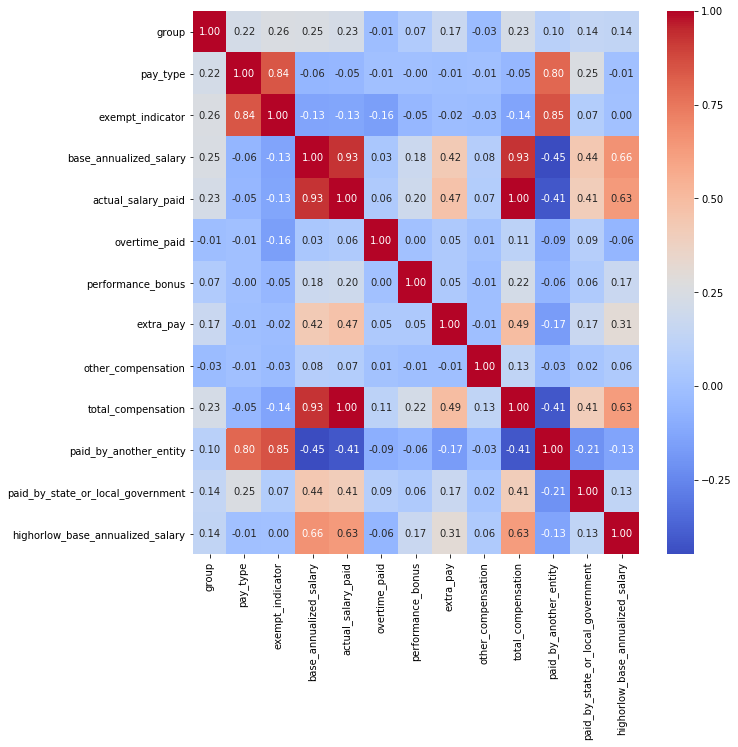

In [870]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

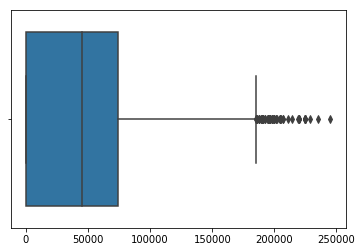

In [871]:
sns.boxplot(np.array(df['base_annualized_salary']))

In [872]:
x=df['actual_salary_paid']
y=df['base_annualized_salary']

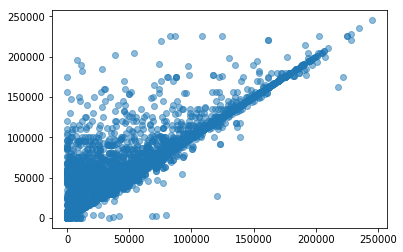

In [873]:
plt.scatter(x, y,  alpha=0.5)
plt.show()

In [874]:
x=df['total_compensation']
y=df['base_annualized_salary']

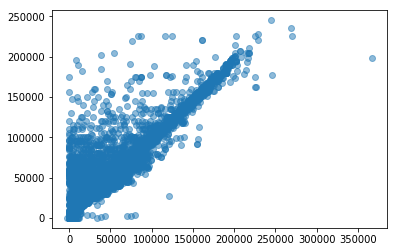

In [875]:
plt.scatter(x, y,  alpha=0.5)
plt.show()

# LINEAR REGRESSION

##### In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

# MODEL 1

In [877]:
cols_to_use = ['actual_salary_paid','total_compensation','exempt_indicator','group','pay_type','paid_by_another_entity','extra_pay']
X = df[cols_to_use]
y = df.base_annualized_salary


# Create the histogram of important fields

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a4d1f98>,
      dtype=object)

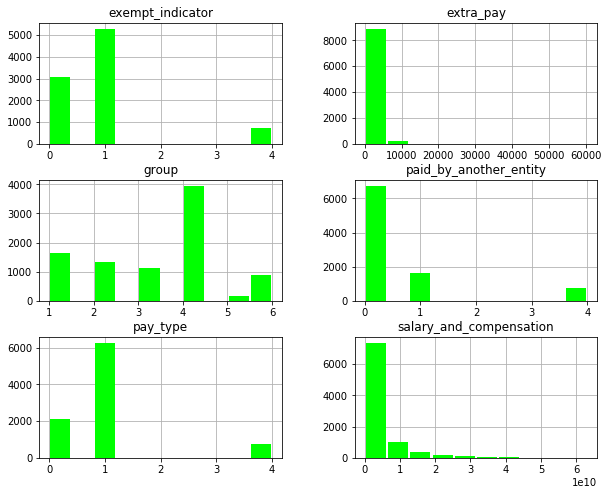

In [788]:
X.hist(figsize=(10,8), color='#00FF00', zorder=2, rwidth=0.9)#Plot the histograms of the important fields

In [789]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 6) (7282,)
(1821, 6) (1821,)


In [790]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [791]:
print ( model.score(X_test, y_test))#Used to print the model score(as to how accurate the model is)

0.8637458316527588


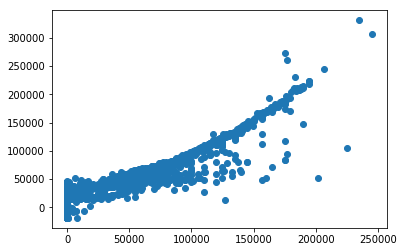

In [792]:
plt.scatter(y_test, predictions)

In [793]:
model = LinearRegression()
results = model.fit(X,y)

In [794]:
print (results.intercept_, results.coef_)

12246.336380946384 [ 4.52872491e-06  1.05966461e+04  1.98655096e+03  1.78424827e+04
 -3.32229480e+04 -2.51366230e-01]


In [795]:
model = sm.OLS(y,X)
results = model.fit()

In [796]:
# Statsmodels gives R-like statistical output like R-squared value AIC,BIC p-value,t-value,standard error
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     base_annualized_salary   R-squared:                       0.928
Model:                                OLS   Adj. R-squared:                  0.928
Method:                     Least Squares   F-statistic:                 1.943e+04
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            23:37:12   Log-Likelihood:            -1.0204e+05
No. Observations:                    9103   AIC:                         2.041e+05
Df Residuals:                        9097   BIC:                         2.041e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
salary_and_compensation  4.574e-06    3.4e-08    134.412      0.000    4.51e-06    4.64e-06
exempt_indicator         1.026e+04    430.694     23.832      0.000    9420.100    1.11e+04
group                    4669.9151     90.352     51.686      0.000    4492.805    4847.025
pay_type                 1.999e+04    371.219     53.862      0.000    1.93e+04    2.07e+04
paid_by_another_entity    -3.4e+04    394.378    -86.206      0.000   -3.48e+04   -3.32e+04
extra_pay                  -0.3828      0.122     -3.144      0.002      -0.621      -0.144
==============================================================================
Omnibus:                     3747.995   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44402.183
Skew:                           1.643   Prob(JB):                         0.00
Kurtosis:                      13.309   Cond. No.                     2.19e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [797]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  salary_and_compensation        0.000005
exempt_indicator           10264.356934
group                       4669.915070
pay_type                   19994.442202
paid_by_another_entity    -33997.875722
extra_pay                     -0.382765
dtype: float64
R2:  0.9276026390598634


## CROSS VALIDATION

In [676]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import train_test_split

In [677]:
def cross_validation(x):
    df=x
    X = np.array(df.drop(["base_annualized_salary","actual_salary_paid","total_compensation","exempt_indicator","group","pay_type","paid_by_another_entity","extra_pay"],axis=1), dtype=pd.Series)
    Y = np.array(df['base_annualized_salary'], dtype=pd.Series)
    lm = linear_model.LinearRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [678]:
cross_validation(df)#Cross validated value returning the Root Mean Squared Error value

31704.886465371197

# Model 2

In [679]:
#Based on the pvalue observed remove the paid_by_another_entity from the first model due to highly negative t-value
cols_to_use = ['actual_salary_paid','total_compensation','exempt_indicator','group','pay_type','extra_pay']
X = df[cols_to_use]
y = df.base_annualized_salary
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 6) (7282,)
(1821, 6) (1821,)


In [680]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

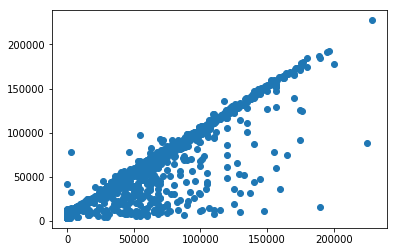

In [681]:
plt.scatter(y_test, predictions)

In [682]:
print ( model.score(X_test, y_test))

0.8483345737641215


In [683]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

3572.3933447704185 [ 1.01805751e+00 -5.92633943e-02 -1.44716745e+03  1.49096973e+03
  2.21295837e+02 -2.99677428e-01]


In [684]:
model2 = sm.OLS(y, X)
results = model2.fit()


In [685]:
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     base_annualized_salary   R-squared:                       0.936
Model:                                OLS   Adj. R-squared:                  0.936
Method:                     Least Squares   F-statistic:                 2.207e+04
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            21:15:05   Log-Likelihood:            -1.0150e+05
No. Observations:                    9103   AIC:                         2.030e+05
Df Residuals:                        9097   BIC:                         2.031e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
actual_salary_paid     1.0349      0.046     22.599      0.000       0.945       1.125
total_compensation    -0.0685      0.045     -1.522      0.128      -0.157       0.020
exempt_indicator   -1360.4459    336.164     -4.047      0.000   -2019.404    -701.488
group               2253.2136     88.867     25.355      0.000    2079.015    2427.413
pay_type             480.4420    338.322      1.420      0.156    -182.745    1143.629
extra_pay             -0.4326      0.121     -3.563      0.000      -0.671      -0.195
==============================================================================
Omnibus:                     7425.616   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189122.309
Skew:                           3.848   Prob(JB):                         0.00
Kurtosis:                      23.962   Cond. No.                     2.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [686]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  actual_salary_paid       1.034948
total_compensation      -0.068462
exempt_indicator     -1360.445892
group                 2253.213639
pay_type               480.441996
extra_pay               -0.432571
dtype: float64
R2:  0.9357233810702212


In [687]:
cross_validation(df)#Return the RMSE score of the model based on the cross validation function

31704.886465371197

# Model 3

In [688]:
#Based on the  highest pvalue observed remove the total_compensation from second model due to highly negative p-value
cols_to_use = ['actual_salary_paid','exempt_indicator','group','pay_type','extra_pay']
X = df[cols_to_use]
y = df.base_annualized_salary
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 5) (7282,)
(1821, 5) (1821,)


In [689]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

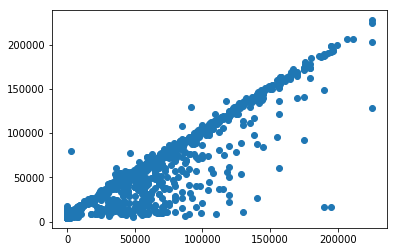

In [690]:
plt.scatter(y_test, predictions)

In [691]:
print ( model.score(X_test, y_test))

0.8730991187402118


In [692]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

3963.3300925653966 [ 9.59462841e-01 -9.04021076e+02  1.33246030e+03 -2.58357898e+02
 -3.75692771e-01]


In [693]:
model2 = sm.OLS(y, X)
results = model2.fit()

In [694]:
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     base_annualized_salary   R-squared:                       0.936
Model:                                OLS   Adj. R-squared:                  0.936
Method:                     Least Squares   F-statistic:                 2.648e+04
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            21:15:07   Log-Likelihood:            -1.0150e+05
No. Observations:                    9103   AIC:                         2.030e+05
Df Residuals:                        9098   BIC:                         2.030e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
actual_salary_paid     0.9656      0.005    213.386      0.000       0.957       0.974
exempt_indicator   -1256.0189    329.113     -3.816      0.000   -1901.155    -610.883
group               2247.0379     88.781     25.310      0.000    2073.008    2421.068
pay_type             385.4888    332.545      1.159      0.246    -266.374    1037.352
extra_pay             -0.4958      0.114     -4.346      0.000      -0.719      -0.272
==============================================================================
Omnibus:                     7418.699   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188598.719
Skew:                           3.843   Prob(JB):                         0.00
Kurtosis:                      23.932   Cond. No.                     1.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [695]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  actual_salary_paid       0.965582
exempt_indicator     -1256.018941
group                 2247.037919
pay_type               385.488784
extra_pay               -0.495771
dtype: float64
R2:  0.9357070106870586


In [696]:
cross_validation(df)

31704.886465371197

### Model 1 is considered to be the most accurate model due to the least AIC,BIC values and Highest R-Squared values when compared with other models

# LOGISTIC REGRESSION

#### It is used to check how accurate the given model is by predicting if the given base annualized salary belongs to a high or low Base annualised salary category 

# Model 1

In [799]:
df.corr()

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary,salary_and_compensation
group,1.000000,0.253260,0.307304,0.273487,0.244196,-0.035602,0.076362,0.204528,-0.032756,0.243471,0.039997,0.132956,0.136536,0.244952
pay_type,0.253260,1.000000,0.504633,0.198610,0.196180,0.064437,0.049191,0.100354,0.031161,0.196447,0.347134,0.293955,0.076793,0.196806
exempt_indicator,0.307304,0.504633,1.000000,0.030114,-0.002515,-0.322843,-0.027404,0.067084,-0.068062,-0.010764,0.544450,-0.006473,0.086694,-0.002469
base_annualized_salary,0.273487,0.198610,0.030114,1.000000,0.930518,0.018961,0.182106,0.444631,0.106915,0.925592,-0.584189,0.456367,0.535942,0.928239
actual_salary_paid,0.244196,0.196180,-0.002515,0.930518,1.000000,0.075740,0.199124,0.483987,0.135352,0.997108,-0.562007,0.440970,0.488998,0.999199
overtime_paid,-0.035602,0.064437,-0.322843,0.018961,0.075740,1.000000,0.012088,0.057632,0.159481,0.120976,-0.149772,0.120698,-0.082599,0.095317
performance_bonus,0.076362,0.049191,-0.027404,0.182106,0.199124,0.012088,1.000000,0.137960,-0.025011,0.212147,-0.089106,0.079017,0.138094,0.206130
extra_pay,0.204528,0.100354,0.067084,0.444631,0.483987,0.057632,0.137960,1.000000,-0.026842,0.504519,-0.224825,0.179303,0.284248,0.495182
other_compensation,-0.032756,0.031161,-0.068062,0.106915,0.135352,0.159481,-0.025011,-0.026842,1.000000,0.165155,-0.097256,0.076681,0.044665,0.148612
total_compensation,0.243471,0.196447,-0.010764,0.925592,0.997108,0.120976,0.212147,0.504519,0.165155,1.000000,-0.556298,0.436390,0.490303,0.999219


In [800]:
cols_to_use = ['base_annualized_salary','actual_salary_paid','total_compensation','exempt_indicator','group','pay_type','paid_by_another_entity','extra_pay']
X = df[cols_to_use]
y = df.highorlow_base_annualized_salary
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 8) (7282,)
(1821, 8) (1821,)


In [801]:
clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [802]:
prediction=clf.predict(X_test)

In [803]:
prob=clf.predict_proba(X_test)
prob

array([[9.98209898e-01, 1.79010183e-03],
       [7.67352743e-01, 2.32647257e-01],
       [9.99903672e-01, 9.63281079e-05],
       ...,
       [9.99641039e-01, 3.58961450e-04],
       [9.99999751e-01, 2.49204419e-07],
       [9.99988070e-01, 1.19297817e-05]])

In [804]:
accuracy=clf.score(X_test, y_test)
accuracy

0.9818780889621087

In [805]:
import statsmodels.formula.api as smf
def logisticModel(x):
    model1 = smf.Logit(df['highorlow_base_annualized_salary'],x).fit()
    print(model1.summary())

In [806]:
logisticModel(df['base_annualized_salary'])
logisticModel(df['actual_salary_paid'])
logisticModel(df['total_compensation'])
logisticModel(df['exempt_indicator'])
logisticModel(df['group'])
logisticModel(df['pay_type'])
logisticModel(df['paid_by_another_entity'])
logisticModel(df['extra_pay'])

Optimization terminated successfully.
         Current function value: 0.593419
         Iterations 5
                                  Logit Regression Results                                  
Dep. Variable:     highorlow_base_annualized_salary   No. Observations:                 9103
Model:                                        Logit   Df Residuals:                     9102
Method:                                         MLE   Df Model:                            0
Date:                              Mon, 25 Feb 2019   Pseudo R-squ.:                  -1.107
Time:                                      23:39:07   Log-Likelihood:                -5401.9
converged:                                     True   LL-Null:                       -2563.8
                                                      LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

In [807]:
def cross_validation(x):
    newdf=x
    X = np.array(newdf.drop(["base_annualized_salary","actual_salary_paid","total_compensation","exempt_indicator","group","pay_type",
"paid_by_another_entity","extra_pay"],axis=1), dtype=pd.Series)
    Y = np.array(newdf['highorlow_base_annualized_salary'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [808]:
cross_validation(df)

6.101897877006527e-15

# Model 2

In [809]:
#Eliminate actual_salary_paid due to very high standard error
cols_to_use = ['base_annualized_salary','total_compensation','exempt_indicator','group','pay_type','paid_by_another_entity','extra_pay']
X = df[cols_to_use]
y = df.highorlow_base_annualized_salary
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(7282, 7) (7282,)
(1821, 7) (1821,)


In [810]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [811]:
prediction=clf.predict(X_test)

In [812]:
prob=clf.predict_proba(X_test)
prob

array([[9.99961077e-01, 3.89233110e-05],
       [9.99820559e-01, 1.79441276e-04],
       [6.86158519e-02, 9.31384148e-01],
       ...,
       [6.94139779e-01, 3.05860221e-01],
       [9.62880993e-01, 3.71190074e-02],
       [9.99999874e-01, 1.26130347e-07]])

In [711]:
accuracy=clf.score(X_test, y_test)
accuracy

0.9445359692476661

In [712]:
import statsmodels.formula.api as smf
def logisticModel(x):
    model2 = smf.Logit(df['highorlow_base_annualized_salary'],x).fit()
    print(model2.summary())

In [713]:
logisticModel(df['base_annualized_salary'])
logisticModel(df['total_compensation'])
logisticModel(df['exempt_indicator'])
logisticModel(df['group'])
logisticModel(df['pay_type'])
logisticModel(df['paid_by_another_entity'])
logisticModel(df['extra_pay'])

Optimization terminated successfully.
         Current function value: 0.630447
         Iterations 4
                                  Logit Regression Results                                  
Dep. Variable:     highorlow_base_annualized_salary   No. Observations:                 9103
Model:                                        Logit   Df Residuals:                     9102
Method:                                         MLE   Df Model:                            0
Date:                              Mon, 25 Feb 2019   Pseudo R-squ.:                  -1.238
Time:                                      21:15:12   Log-Likelihood:                -5739.0
converged:                                     True   LL-Null:                       -2563.8
                                                      LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

In [714]:
def cross_validation(x):
    newdf=x
    X = np.array(newdf.drop(["base_annualized_salary","total_compensation","exempt_indicator","group","pay_type",
"paid_by_another_entity","extra_pay"],axis=1), dtype=pd.Series)
    Y = np.array(newdf['highorlow_base_annualized_salary'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [715]:
cross_validation(df)

1.2518558761966217e-13

# Model 3

In [716]:
#Eliminate total_compensation due to very high standard error
cols_to_use = ['base_annualized_salary','actual_salary_paid','exempt_indicator','group','pay_type','paid_by_another_entity','extra_pay']
X = df[cols_to_use]
y = df.highorlow_base_annualized_salary
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 7) (7282,)
(1821, 7) (1821,)


In [717]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [718]:
prediction=clf.predict(X_test)

In [719]:
prob=clf.predict_proba(X_test)
prob

array([[0.9924673 , 0.0075327 ],
       [0.97137018, 0.02862982],
       [0.87809826, 0.12190174],
       ...,
       [0.99504147, 0.00495853],
       [0.9637388 , 0.0362612 ],
       [0.96518723, 0.03481277]])

In [720]:
accuracy=clf.score(X_test, y_test)
accuracy

0.9445359692476661

In [721]:
import statsmodels.formula.api as smf
def logisticModel(x):
    model3 = smf.Logit(df['highorlow_base_annualized_salary'],x).fit()
    print(model3.summary())

In [722]:
logisticModel(df['base_annualized_salary'])
logisticModel(df['actual_salary_paid'])
logisticModel(df['exempt_indicator'])
logisticModel(df['group'])
logisticModel(df['pay_type'])
logisticModel(df['paid_by_another_entity'])
logisticModel(df['extra_pay'])

Optimization terminated successfully.
         Current function value: 0.630447
         Iterations 4
                                  Logit Regression Results                                  
Dep. Variable:     highorlow_base_annualized_salary   No. Observations:                 9103
Model:                                        Logit   Df Residuals:                     9102
Method:                                         MLE   Df Model:                            0
Date:                              Mon, 25 Feb 2019   Pseudo R-squ.:                  -1.238
Time:                                      21:15:14   Log-Likelihood:                -5739.0
converged:                                     True   LL-Null:                       -2563.8
                                                      LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

In [723]:
def cross_validation(x):
    newdf=x
    X = np.array(newdf.drop(["base_annualized_salary","actual_salary_paid","exempt_indicator","group","pay_type",
"paid_by_another_entity","extra_pay"],axis=1), dtype=pd.Series)
    Y = np.array(newdf['highorlow_base_annualized_salary'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [724]:
cross_validation(df)

8.703664351411541e-14

### Model 2 is considered to be the best model due to highest accuracy score when compared with other models, that is, there is the model is 94% accuracy in deteremining if a particular employee has High or the Low base annual salary when compared with other independent variable inputs

# MULTI COLLINEARITY

In [725]:
df.corr()

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary
group,1.000000,0.222448,0.257006,0.248772,0.228743,-0.014783,0.066168,0.172415,-0.026607,0.226657,0.096132,0.143279,0.136536
pay_type,0.222448,1.000000,0.841720,-0.056641,-0.047984,-0.005478,-0.002835,-0.010648,-0.006285,-0.047549,0.801626,0.253067,-0.006493
exempt_indicator,0.257006,0.841720,1.000000,-0.133641,-0.129348,-0.159560,-0.050304,-0.019487,-0.025291,-0.136930,0.853659,0.072214,0.003762
base_annualized_salary,0.248772,-0.056641,-0.133641,1.000000,0.931908,0.033521,0.179463,0.424765,0.079130,0.927172,-0.448707,0.439370,0.664454
actual_salary_paid,0.228743,-0.047984,-0.129348,0.931908,1.000000,0.060595,0.195881,0.466700,0.071941,0.995867,-0.414153,0.409482,0.632844
overtime_paid,-0.014783,-0.005478,-0.159560,0.033521,0.060595,1.000000,0.002136,0.050689,0.006197,0.112414,-0.086702,0.088589,-0.057189
performance_bonus,0.066168,-0.002835,-0.050304,0.179463,0.195881,0.002136,1.000000,0.050328,-0.008110,0.219723,-0.056610,0.058389,0.173241
extra_pay,0.172415,-0.010648,-0.019487,0.424765,0.466700,0.050689,0.050328,1.000000,-0.012879,0.491119,-0.167692,0.170806,0.305728
other_compensation,-0.026607,-0.006285,-0.025291,0.079130,0.071941,0.006197,-0.008110,-0.012879,1.000000,0.132428,-0.033170,0.023811,0.058167
total_compensation,0.226657,-0.047549,-0.136930,0.927172,0.995867,0.112414,0.219723,0.491119,0.132428,1.000000,-0.414234,0.409299,0.627923


### actual_salary_paid and total_comapensation term are having highest correlation with our target column : base_annualized_salary, so we are considerig actual_salary_paid term alone from our best Model 1 of the linear regression model for performing multi-collinearity test

In [726]:
cols_to_use = ['base_annualized_salary','total_compensation','exempt_indicator','group','pay_type','paid_by_another_entity','extra_pay']
X = df[cols_to_use]
y = df.highorlow_base_annualized_salary
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 7) (7282,)
(1821, 7) (1821,)


In [727]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [728]:
print ( model.score(X_test, y_test))

0.5636807763351884


In [729]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

-0.10081986370886167 [ 5.55676382e-06  3.29590537e-07 -4.95748276e-02 -7.48984425e-03
 -1.34394029e-01  2.15299928e-01  3.03909522e-06]


In [730]:
model = sm.OLS(y_train,X_train)
results = model.fit()



In [731]:
# Statsmodels gives R-like statistical output
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     highorlow_base_annualized_salary   R-squared:                       0.569
Model:                                          OLS   Adj. R-squared:                  0.569
Method:                               Least Squares   F-statistic:                     1373.
Date:                              Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                                      21:15:16   Log-Likelihood:                 1883.5
No. Observations:                              7282   AIC:                            -3753.
Df Residuals:                                  7275   BIC:                            -3705.
Df Model:                                         7                                         
Covariance Type:                          nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
base_annualized_salary  5.334e-06   1.36e-07     39.223      0.000    5.07e-06     5.6e-06
total_compensation      2.968e-07   1.31e-07      2.264      0.024    3.98e-08    5.54e-07
exempt_indicator          -0.0432      0.005     -8.331      0.000      -0.053      -0.033
group                     -0.0281      0.001    -24.602      0.000      -0.030      -0.026
pay_type                  -0.1453      0.005    -30.435      0.000      -0.155      -0.136
paid_by_another_entity     0.2101      0.006     36.696      0.000       0.199       0.221
extra_pay               5.099e-06   1.42e-06      3.600      0.000    2.32e-06    7.87e-06
==============================================================================
Omnibus:                     1476.625   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3536.310
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                     2.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [732]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  base_annualized_salary    5.334267e-06
total_compensation        2.967652e-07
exempt_indicator         -4.316950e-02
group                    -2.805094e-02
pay_type                 -1.453349e-01
paid_by_another_entity    2.101113e-01
extra_pay                 5.098811e-06
dtype: float64
R2:  0.569208807906749


In [733]:
cross_validation(df)

8.703664351411541e-14

## The model having multicollinearity, gives better results when compared with the regression analysis.Since, the model with both actual_salary_paid and total_comapensation give better results rather than when actual_salary_paid parameter is remeoved, yielding an R-Squared value of 0.57

# Stepwise Regression
#### Stepwise regression is based on  the addition of the independent variables for each model

### MODEL 1

In [734]:
X=df[['overtime_paid']]
y=df['base_annualized_salary']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 1) (7282,)
(1821, 1) (1821,)


In [735]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [736]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

46760.500780293485 [0.65365657]


In [737]:
model1 = sm.OLS(y_train,X_train)
results = model1.fit()

In [738]:
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     base_annualized_salary   R-squared:                       0.025
Model:                                OLS   Adj. R-squared:                  0.025
Method:                     Least Squares   F-statistic:                     187.5
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):           3.69e-42
Time:                            21:15:19   Log-Likelihood:                -91092.
No. Observations:                    7282   AIC:                         1.822e+05
Df Residuals:                        7281   BIC:                         1.822e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
overtime_paid     4.4024      0.321     13.693      0.000       3.772       5.033
==============================================================================
Omnibus:                      833.597   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.113
Skew:                           0.943   Prob(JB):                    5.97e-249
Kurtosis:                       3.455   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 2

In [739]:
#parameters are added one by one
X=df[['overtime_paid','actual_salary_paid']]
y=df['base_annualized_salary']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 2) (7282,)
(1821, 2) (1821,)


In [740]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [741]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

6833.554306043785 [-0.44019402  0.96693894]


In [742]:
model1 = sm.OLS(y_train,X_train)
results = model1.fit()



In [743]:
# Statsmodels gives R-like statistical output
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     base_annualized_salary   R-squared:                       0.934
Model:                                OLS   Adj. R-squared:                  0.934
Method:                     Least Squares   F-statistic:                 5.180e+04
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            21:15:22   Log-Likelihood:                -81202.
No. Observations:                    7282   AIC:                         1.624e+05
Df Residuals:                        7280   BIC:                         1.624e+05
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
overtime_paid         -0.2130      0.085     -2.495      0.013      -0.380      -0.046
actual_salary_paid     1.0416      0.003    317.324      0.000       1.035       1.048
==============================================================================
Omnibus:                     5718.662   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122800.220
Skew:                           3.694   Prob(JB):                         0.00
Kurtosis:                      21.712   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 3

In [744]:
#parameters are added one by one
X=df[['overtime_paid','actual_salary_paid','total_compensation']]
y=df['base_annualized_salary']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 3) (7282,)
(1821, 3) (1821,)


In [745]:
lm = linear_model.LinearRegression()
model3 = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [746]:
model3 = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

7026.103291657804 [-0.31241719  1.08843317 -0.11939843]


In [747]:
model3 = sm.OLS(y_train,X_train)
results = model3.fit()

In [748]:
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     base_annualized_salary   R-squared:                       0.931
Model:                                OLS   Adj. R-squared:                  0.931
Method:                     Least Squares   F-statistic:                 3.263e+04
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            21:15:23   Log-Likelihood:                -81495.
No. Observations:                    7282   AIC:                         1.630e+05
Df Residuals:                        7279   BIC:                         1.630e+05
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
overtime_paid         -0.0319      0.122     -0.262      0.793      -0.271       0.207
actual_salary_paid     1.2198      0.086     14.140      0.000       1.051       1.389
total_compensation    -0.1733      0.084     -2.063      0.039      -0.338      -0.009
==============================================================================
Omnibus:                     5946.974   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148346.965
Skew:                           3.857   Prob(JB):                         0.00
Kurtosis:                      23.722   Cond. No.                         68.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 4

In [749]:
#parameters are added one by one
X=df[['actual_salary_paid','total_compensation','exempt_indicator','group','pay_type','paid_by_another_entity','extra_pay']]
y=df['base_annualized_salary']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 7) (7282,)
(1821, 7) (1821,)


In [750]:
lm = linear_model.LinearRegression()
model4 = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [751]:
model4 = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

4214.729020982464 [ 7.88444001e-01  4.49893953e-02  7.86114457e+03  9.00332772e+02
  5.96793352e+03 -1.55500744e+04 -3.08746244e-01]


In [752]:
model4 = sm.OLS(y_train,X_train)
results = model4.fit()

In [753]:
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     base_annualized_salary   R-squared:                       0.944
Model:                                OLS   Adj. R-squared:                  0.944
Method:                     Least Squares   F-statistic:                 1.738e+04
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            21:15:24   Log-Likelihood:                -80719.
No. Observations:                    7282   AIC:                         1.615e+05
Df Residuals:                        7275   BIC:                         1.615e+05
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
actual_salary_paid         0.7790      0.046     17.012      0.000       0.689       0.869
total_compensation         0.0634      0.045      1.423      0.155      -0.024       0.151
exempt_indicator        7665.8868    436.774     17.551      0.000    6809.684    8522.090
group                   1777.3348     93.349     19.040      0.000    1594.344    1960.325
pay_type                6475.5152    394.174     16.428      0.000    5702.820    7248.211
paid_by_another_entity -1.546e+04    451.471    -34.233      0.000   -1.63e+04   -1.46e+04
extra_pay                 -0.4102      0.124     -3.300      0.001      -0.654      -0.167
==============================================================================
Omnibus:                     5772.598   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157924.380
Skew:                           3.639   Prob(JB):                         0.00
Kurtosis:                      24.622   Cond. No.                     2.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Therefore, we can infer from the above models that whenever a highly correlated independent variable with respect to the given dependent variable(base_annualised_salary) is added to the model, the R-Squared values either increases or remains the same. 

# INTERACTION EFFECT

## Interaction effect is observed when we create a term, formed from the combination of two highly correlated terms with respect to the dependent variable 

In [754]:
df.shape

(9103, 13)

In [755]:
#creating a new column with a combination of actual_salary_paid and total_comapensation
df.insert(13, "salary_and_compensation",True) 

In [760]:
#assigning the value to the new column created
df['salary_and_compensation']=df['actual_salary_paid']*df['total_compensation']

In [761]:
df.corr()

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government,highorlow_base_annualized_salary,salary_and_compensation
group,1.000000,0.222448,0.257006,0.248772,0.228743,-0.014783,0.066168,0.172415,-0.026607,0.226657,0.096132,0.143279,0.136536,0.184065
pay_type,0.222448,1.000000,0.841720,-0.056641,-0.047984,-0.005478,-0.002835,-0.010648,-0.006285,-0.047549,0.801626,0.253067,-0.006493,-0.017524
exempt_indicator,0.257006,0.841720,1.000000,-0.133641,-0.129348,-0.159560,-0.050304,-0.019487,-0.025291,-0.136930,0.853659,0.072214,0.003762,-0.042441
base_annualized_salary,0.248772,-0.056641,-0.133641,1.000000,0.931908,0.033521,0.179463,0.424765,0.079130,0.927172,-0.448707,0.439370,0.664454,0.847795
actual_salary_paid,0.228743,-0.047984,-0.129348,0.931908,1.000000,0.060595,0.195881,0.466700,0.071941,0.995867,-0.414153,0.409482,0.632844,0.916797
overtime_paid,-0.014783,-0.005478,-0.159560,0.033521,0.060595,1.000000,0.002136,0.050689,0.006197,0.112414,-0.086702,0.088589,-0.057189,0.017408
performance_bonus,0.066168,-0.002835,-0.050304,0.179463,0.195881,0.002136,1.000000,0.050328,-0.008110,0.219723,-0.056610,0.058389,0.173241,0.252363
extra_pay,0.172415,-0.010648,-0.019487,0.424765,0.466700,0.050689,0.050328,1.000000,-0.012879,0.491119,-0.167692,0.170806,0.305728,0.460566
other_compensation,-0.026607,-0.006285,-0.025291,0.079130,0.071941,0.006197,-0.008110,-0.012879,1.000000,0.132428,-0.033170,0.023811,0.058167,0.108674
total_compensation,0.226657,-0.047549,-0.136930,0.927172,0.995867,0.112414,0.219723,0.491119,0.132428,1.000000,-0.414234,0.409299,0.627923,0.917095


---------------
It can be noted that the correlation is high synergistically when the two independent variables are multiplied together with the dependent variable price

In [765]:
#only adding the newly created column and dropping the other two columns (actual_salary_paid,total_compensation) 
cols_to_use = ['salary_and_compensation','base_annualized_salary','exempt_indicator','group','pay_type','paid_by_another_entity','extra_pay']
X = df[cols_to_use]
y = df.highorlow_base_annualized_salary
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 7) (7282,)
(1821, 7) (1821,)


In [766]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [767]:
prediction=clf.predict(X_test)

In [768]:
prob=clf.predict_proba(X_test)
prob

array([[0.50000002, 0.49999998],
       [0.50000001, 0.49999999],
       [0.50000002, 0.49999998],
       ...,
       [0.83250609, 0.16749391],
       [0.78020807, 0.21979193],
       [0.53748312, 0.46251688]])

In [769]:
accuracy=clf.score(X_test, y_test)
accuracy

0.9648544755628775

# MODEL 2

In [773]:
cols_to_use = ['salary_and_compensation','exempt_indicator','group','pay_type','paid_by_another_entity','extra_pay']
X = df[cols_to_use]
y = df.base_annualized_salary


In [774]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 6) (7282,)
(1821, 6) (1821,)


In [775]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

12298.884633062247 [ 4.58243035e-06  1.05818469e+04  1.93919533e+03  1.76603257e+04
 -3.29964001e+04 -2.82720859e-01]


In [776]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     base_annualized_salary   R-squared:                       0.928
Model:                                OLS   Adj. R-squared:                  0.928
Method:                     Least Squares   F-statistic:                 1.560e+04
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            21:47:20   Log-Likelihood:                -81584.
No. Observations:                    7282   AIC:                         1.632e+05
Df Residuals:                        7276   BIC:                         1.632e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
salary_and_compensation  4.634e-06   3.87e-08    119.597      0.000    4.56e-06    4.71e-06
exempt_indicator         1.031e+04    479.213     21.517      0.000    9371.981    1.13e+04
group                    4628.7741    100.906     45.872      0.000    4430.970    4826.579
pay_type                 1.981e+04    411.810     48.114      0.000     1.9e+04    2.06e+04
paid_by_another_entity  -3.381e+04    441.293    -76.624      0.000   -3.47e+04   -3.29e+04
extra_pay                  -0.4582      0.146     -3.133      0.002      -0.745      -0.172
==============================================================================
Omnibus:                     3111.144   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38219.290
Skew:                           1.708   Prob(JB):                         0.00
Kurtosis:                      13.691   Cond. No.                     2.17e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### From MODEL 1(logic regression model) and MODEL 2(linear regression model) , we can see that Improvement in the accuracy and R-sqaured values ,when the attributes are multiplied together and treated as a single unit 

# REGULARIZATION

## Ridge Regularization
### (alpha is the magnitude of coefficients,that is used to produce the best desired results
### alpha= 0, model is a linear fit model

In [777]:
cols_to_use = ['salary_and_compensation','exempt_indicator','group','pay_type','paid_by_another_entity','extra_pay']
X = df[cols_to_use]
y = df.base_annualized_salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7282, 6) (7282,)
(1821, 6) (1821,)


In [779]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [780]:
for alpha_range in [0,0.2,0.4,0.6,0.8,1.0]:
    results = Lasso(alpha=alpha_range).fit(X_train, y_train)
    print("alpha =",alpha_range)
    print("The Result value for the data are as follows:")
    print("The intercept and slopes are as follows:")
    print (results.intercept_, results.coef_)
    print("R-Squared value of training set data:", results.score(X_train,y_train))
    print("R-Squared value of testing set data:", results.score(X_test,y_test))

alpha = 0
The Result value for the data are as follows:
The intercept and slopes are as follows:
12298.884633062218 [ 4.58243035e-06  1.05818469e+04  1.93919533e+03  1.76603257e+04
 -3.29964001e+04 -2.82720859e-01]
R-Squared value of training set data: 0.8641547309030129
R-Squared value of testing set data: 0.8637458316527588
alpha = 0.2
The Result value for the data are as follows:
The intercept and slopes are as follows:
12299.439952729153 [ 4.58248672e-06  1.05806353e+04  1.93923934e+03  1.76595919e+04
 -3.29946486e+04 -2.82649936e-01]
R-Squared value of training set data: 0.8641547305624525
R-Squared value of testing set data: 0.863745406465827
alpha = 0.4
The Result value for the data are as follows:
The intercept and slopes are as follows:
12299.995272396147 [ 4.58254309e-06  1.05794238e+04  1.93928334e+03  1.76588581e+04
 -3.29928970e+04 -2.82579013e-01]
R-Squared value of training set data: 0.8641547295407717
R-Squared value of testing set data: 0.8637449805886505
alpha = 0.6
T

# CONCLUSION:
## In this analysis,various techniques(Linear regression, Logistic regression, Multi collinearity, Ridge regularization) have been used to find out the factors affecting the base annualized salary of an employee 
## The Linear regression model gives an accurate model with 0.97 R-squared value, illustrating that the accurate base annualized salary of an employee can be determined by using the given set of inputs as shown in MODEL1
## The Logistic regression model gives an accurate model with 94% accuracy, given the base annualized salary of an employee belongs to high or low salary, using the given set of inputs as shown in MODEL2
## The Multi collinearity and Stepwise regression helped us to find out the final model based on the best model (Model 2) in the linear regresion
## The interaction model formed from the combination of two highly correlated attributes,showed the improvement in the accuracy and R-sqaured values when compared with the individual independent variables
## The Ridge regularization, showcased the result with an alpha value of 0, producing a linear fit model

# CITATIONS:
### https://towardsdatascience.com/application-of-hypothesis-testing-and-spearmans-rank-correlation-coefficient-to-demystify-b3a554730c91
### https://seaborn.pydata.org/tutorial/regression.html#regression-tutorialhttps://www.youtube.com/watch?v=6dbrR-WymjI
### https://github.com/rohan8594/Logistic-Regression-on-Titanic-Dataset/blob/master/Logistic_Regression_Titanic.ipynbhttps://www.youtube.com/watch?v=E5RjzSK0fvY&t=4s
### https://github.com/wikipda7/Linear-Regression-Model-for-Boston-Housing-Dataset-Vishal-_files/blob/master/Linear%20Model%20for%20Boston%20Dataset%20(Vishal).ipynb
### https://www.coursera.org/lecture/python-machine-learning/linear-regression-ridge-lasso-and-polynomial-regression-M7yUQ
### https://towardsdatascience.com/

# CONTRIBUTIONS
### The percentage of code written independently is: 60%
### The percentage of code used from external sources is: 40%

# LICENSE

### Copyright 2019 Nupur

### Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

### The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

### THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.